<a href="https://colab.research.google.com/github/Deli8t/data/blob/master/Delight_1_Assignment_Introduction_to_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Notebook -Introduction to Machine Learning

# Background Information

HR analytics is revolutionising the way human resources departments operate, leading
to higher efficiency and better results overall. Human resources have been using
analytics for years. However, the collection, processing, and analysis of data have been
largely manual, and given the nature of human resources dynamics and HR KPIs, the
approach has been constraining HR. Therefore, it is surprising that HR departments
woke up to the utility of machine learning so late in the game.


**Problem Statement**

Your client is a large Multinational Corporation, and they have nine broad verticals
across the organization. One of the problems your client faces is identifying the right
people for promotion (only for the manager position and below) and preparing them in
time.
Currently the process, they are following is:

● They first identify a set of employees based on recommendations/ past
performance.

● Selected employees go through the separate training and evaluation program for
each vertical.

● These programs are based on the required skill of each vertical.

 At the end of the
program, based on various factors such as training performance, KPI completion
(only employees with KPIs completed greater than 60% are considered) etc., the
employee gets a promotion.
For the process mentioned above, the final promotions are only announced after the
evaluation, and this leads to a delay in transition to their new roles. Hence, the company
needs your help in identifying the eligible candidates at a particular checkpoint so that
they can expedite the entire promotion cycle.
They have provided multiple attributes around employees’ past and current performance
along with demographics. Now, The task is to predict whether a potential promotee at a
checkpoint will be promoted or not after the evaluation process.



**Dataset**

● Dataset URL: https://bit.ly/2ODZvLCHRDataset

● Glossary URL: https://bit.ly/2Wz3sWcGlossary

Project Source: https://bit.ly/2CFzoRX




# 1.Data Exploration

In [84]:
#We will now import  libraries we require  to read our csv file 
# from an external the source. 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import average_precision_score

hr_dataset = pd.read_csv("https://bit.ly/2ODZvLCHRDataset")
                 
hr_dataset.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [ ]:
#Importing Train and Test Dataset
data_test=pd.read_csv('/content/test_2umaH9m.csv')
data_train=pd.read_csv('/content/train_LZdllcl.csv')



In [ ]:
data_train.shape

(54808, 14)

In [ ]:
data_test.shape

(23490, 13)

In [ ]:
data_train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [ ]:
#Checking the type of a dataset
data_train.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [14]:
#Checking for missing values
data_train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [15]:
data_test.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [16]:
#Filling missing value with 0
data_train['previous_year_rating'].fillna(0,inplace=True)
data_test['previous_year_rating'].fillna(0,inplace=True)

In [17]:
data_train['education'].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [18]:
#Filling missing value with Other's as it showed higher f1 score
data_train['education'].fillna("Other's" ,inplace=True)
data_test['education'].fillna("Other's", inplace=True)

In [19]:
data_train['education'].value_counts()

Bachelor's          36669
Master's & above    14925
Other's              2409
Below Secondary       805
Name: education, dtype: int64

In [20]:
#Checking final datasets after corrections
data_train.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [21]:
data_test.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

In [22]:
#Check for Imbalance of Target Column in Datasets
data_train['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

Text(0.5, 1.0, 'Fig 3: is_promoted')

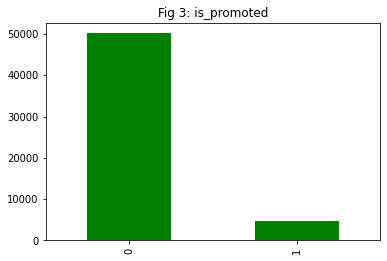

In [34]:
#is_promoted
data_train['is_promoted'].value_counts().plot.bar(color='g')
plt.title('Fig 3: is_promoted')

Text(0.5, 1.0, 'Fig 4: Different Departments')

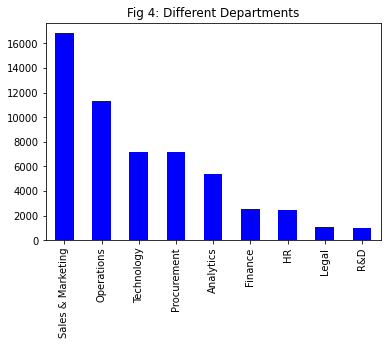

In [33]:
#Departments
data_train['department'].value_counts().plot.bar(color='b')
plt.title('Fig 4: Different Departments')


Text(0.5, 1.0, 'Fig 5: Different regions')

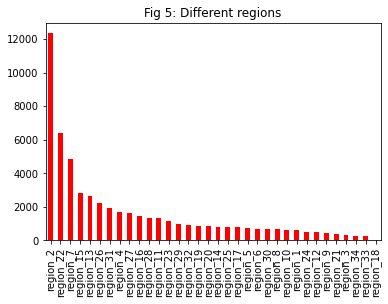

In [35]:
#region
data_train['region'].value_counts().plot.bar(color='r')
plt.title('Fig 5: Different regions')

Text(0.5, 1.0, 'Fig 6: Education')

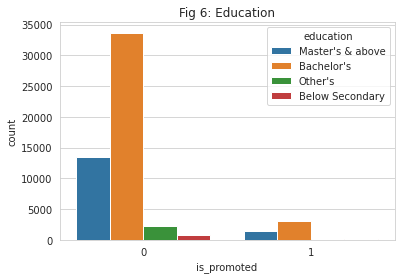

In [36]:
#Education
sns.set_style('whitegrid')
sns.countplot(x='is_promoted',hue='education',data=data_train)
plt.title('Fig 6: Education')

Text(0.5, 1.0, 'Fig 7: Gender')

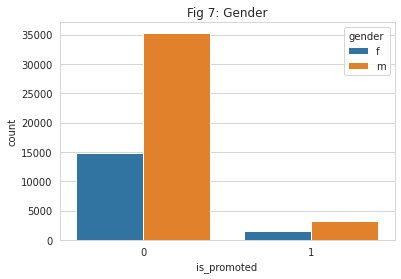

In [37]:
#Gender
sns.set_style('whitegrid')
sns.countplot(x='is_promoted',hue='gender',data=data_train)
plt.title('Fig 7: Gender')

Text(0.5, 1.0, 'Fig 8: Recruitment_channel')

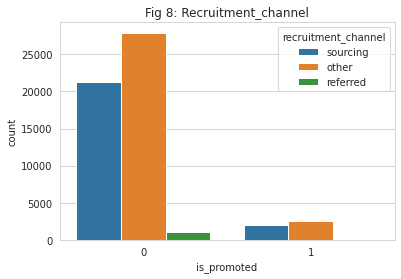

In [38]:
#Recruitment_channel
sns.set_style('whitegrid')
sns.countplot(x='is_promoted',hue='recruitment_channel',data=data_train)
plt.title('Fig 8: Recruitment_channel')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Fig 9: Ages')

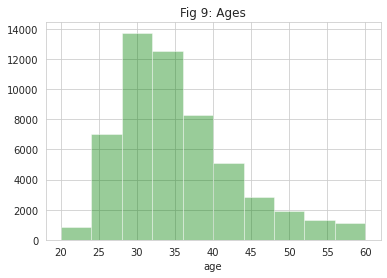

In [39]:
#Age
sns.distplot(data_train['age'],kde=False,bins=10,color='g')
plt.title('Fig 9: Ages')

Text(0.5, 1.0, 'Fig 10: Previous year rating')

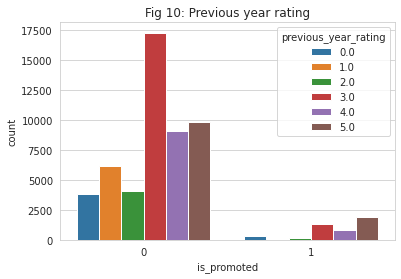

In [40]:
#Previous year rating
sns.set_style('whitegrid')
sns.countplot(x='is_promoted',hue='previous_year_rating',data=data_train)
plt.title('Fig 10: Previous year rating')

Text(0.5, 1.0, 'Fig 11: Length of service')

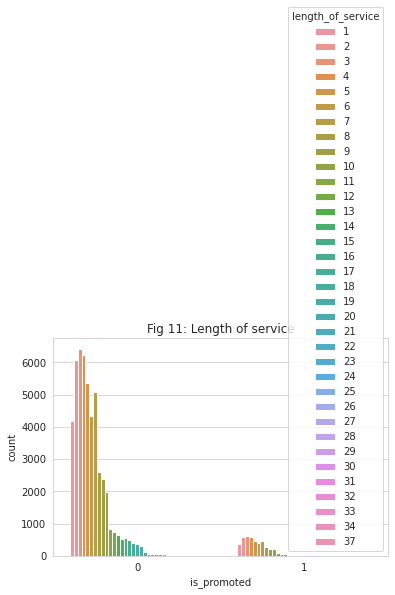

In [41]:
#Length of service
sns.set_style('whitegrid')
sns.countplot(x='is_promoted',hue='length_of_service',data=data_train)
plt.title('Fig 11: Length of service')

Text(0.5, 1.0, 'Fig 12: KPIs_met >80%')

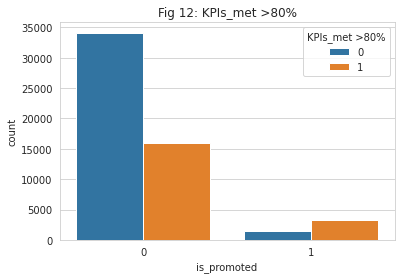

In [42]:
#KPI >80%
sns.set_style('whitegrid')
sns.countplot(x='is_promoted',hue='KPIs_met >80%',data=data_train)
plt.title('Fig 12: KPIs_met >80%')

Text(0.5, 1.0, 'Fig 13: Awards won')

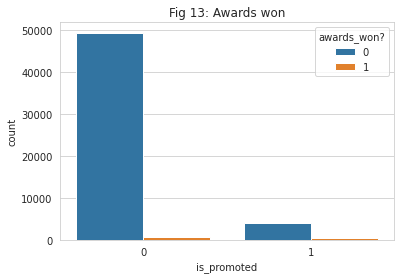

In [43]:
# Awards won
sns.set_style('whitegrid')
sns.countplot(x='is_promoted',hue='awards_won?',data=data_train)
plt.title('Fig 13: Awards won')

# 2.Data Processing

In [44]:
#We start by checking  unique values
#Department
data_train['department'].unique()

array(['Sales & Marketing', 'Operations', 'Technology', 'Analytics',
       'R&D', 'Procurement', 'Finance', 'HR', 'Legal'], dtype=object)

In [45]:
#Region
data_train['region'].unique()

array(['region_7', 'region_22', 'region_19', 'region_23', 'region_26',
       'region_2', 'region_20', 'region_34', 'region_1', 'region_4',
       'region_29', 'region_31', 'region_15', 'region_14', 'region_11',
       'region_5', 'region_28', 'region_17', 'region_13', 'region_16',
       'region_25', 'region_10', 'region_27', 'region_30', 'region_12',
       'region_21', 'region_8', 'region_32', 'region_6', 'region_33',
       'region_24', 'region_3', 'region_9', 'region_18'], dtype=object)

In [46]:
#Gender
data_train['gender'].unique()

array(['f', 'm'], dtype=object)

In [47]:
#Recruitment Channel
data_train['recruitment_channel'].unique()

array(['sourcing', 'other', 'referred'], dtype=object)

In [48]:
#Then Data Encoding
#One Hot Encoding
df_train =pd.get_dummies(data_train,columns=['gender','region','education','department','recruitment_channel'],drop_first=True)
df_test=pd.get_dummies(data_test,columns=['gender','region','education','department','recruitment_channel'],drop_first=True)

In [49]:
df_train.head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,gender_m,region_region_10,region_region_11,region_region_12,region_region_13,region_region_14,region_region_15,region_region_16,region_region_17,region_region_18,region_region_19,region_region_2,region_region_20,region_region_21,region_region_22,region_region_23,region_region_24,region_region_25,region_region_26,region_region_27,region_region_28,region_region_29,region_region_3,region_region_30,region_region_31,region_region_32,region_region_33,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Master's & above,education_Other's,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,recruitment_channel_referred,recruitment_channel_sourcing
0,65438,1,35,5.0,8,1,0,49,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
1,65141,1,30,5.0,4,0,0,60,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,7513,1,34,3.0,7,0,0,50,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,2542,2,39,1.0,10,0,0,50,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,48945,1,45,3.0,2,0,0,73,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [50]:
df_train.shape

(54808, 56)

In [51]:
df_test.shape

(23490, 55)

In [71]:
#Split Train Data into Features & Target

X_train = df_train.drop(['is_promoted','employee_id'],axis=1)
y_train = df_train['is_promoted']
X_test =df_test.drop(['employee_id'],axis=1) 
#Train_Test Split
X_train,X_valid,y_train,y_valid = train_test_split(X_train,y_train,test_size=0.2,random_state=12345)
#Feature Scaling
scaler=RobustScaler()
scaler.fit(X_train)
X_train=pd.DataFrame(scaler.transform(X_train))
X_valid=pd.DataFrame(scaler.fit_transform(X_valid))
X_test=pd.DataFrame(scaler.fit_transform(X_test))

X_train.head()



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53
0,1.0,-0.8,-1.0,-0.75,0.0,0.0,0.32,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.2,0.5,-0.25,0.0,0.0,-0.48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,-0.2,0.0,0.25,0.0,0.0,0.88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,-0.5,1.0,-0.75,0.0,0.0,-0.28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,2.3,1.0,5.25,0.0,0.0,-0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


# 3.Data Modeling
(Using  Random Forest and Logistic Regression)

In [59]:
# Logistic Regression
model_1=LogisticRegression()
model_1.fit(X_train, y_train)
pred_1= model_1.predict(X_valid)
from sklearn.metrics import classification_report
print(classification_report(y_valid,pred_1))



              precision    recall  f1-score   support

           0       0.93      1.00      0.96      9995
           1       0.85      0.25      0.38       967

    accuracy                           0.93     10962
   macro avg       0.89      0.62      0.67     10962
weighted avg       0.92      0.93      0.91     10962



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [94]:
#Random Forest
#spliting dataset into train & test 

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

rfc_pred = rfc.predict(X_test)

print("Training Accuracy :", rfc.score(X_train, y_train)*100)

print("Validation Accuracy :", rfc.score(X_valid, y_valid)*100)




Training Accuracy : 99.9794736121881
Validation Accuracy : 93.57781426746944


# 4.Summary of Findings and Recommendations

I recommend RandomForest as the model to use for the promotion excersice as it has a higher rate of Accuracy.